In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
cal = pd.read_csv('Datasets/calories.csv')
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
feat = pd.read_csv('Datasets/exercise.csv')
feat.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
df = pd.merge(cal,feat, how="outer")
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,10001159,76.0,female,67,176.0,74.0,12.0,103.0,39.6
1,10001607,93.0,female,34,178.0,79.0,19.0,96.0,40.6
2,10005485,49.0,female,38,178.0,77.0,14.0,82.0,40.5
3,10005630,36.0,female,39,169.0,66.0,8.0,90.0,39.6
4,10006441,122.0,male,23,169.0,73.0,25.0,102.0,40.7


In [7]:
df.shape


(15000, 9)

In [8]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


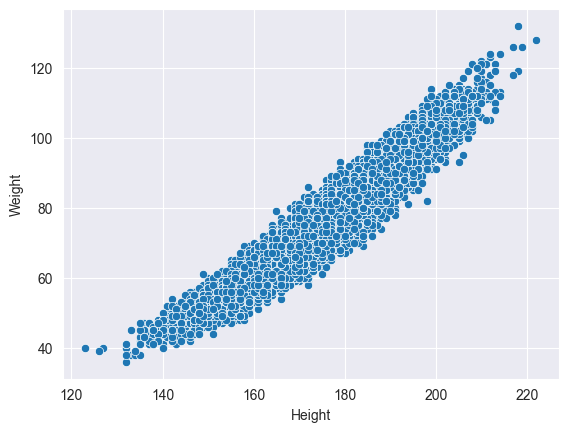

In [10]:
sns.scatterplot(x='Height', y='Weight', data=df)
plt.show()

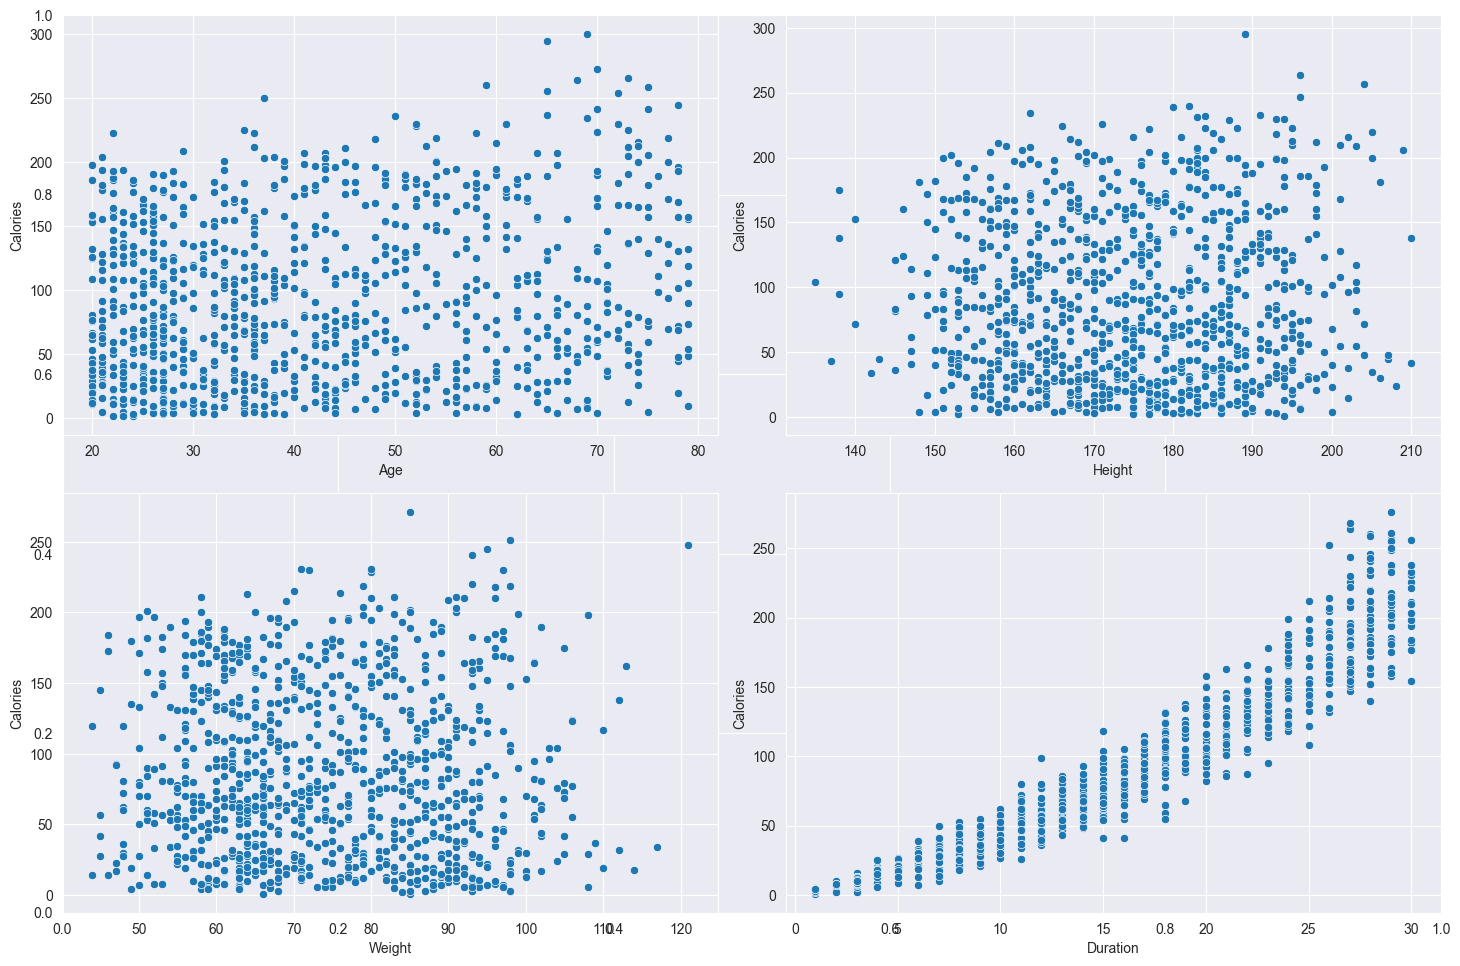

In [13]:
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)
    sns.scatterplot(x=col, y='Calories', data=x)
plt.tight_layout()
plt.show()

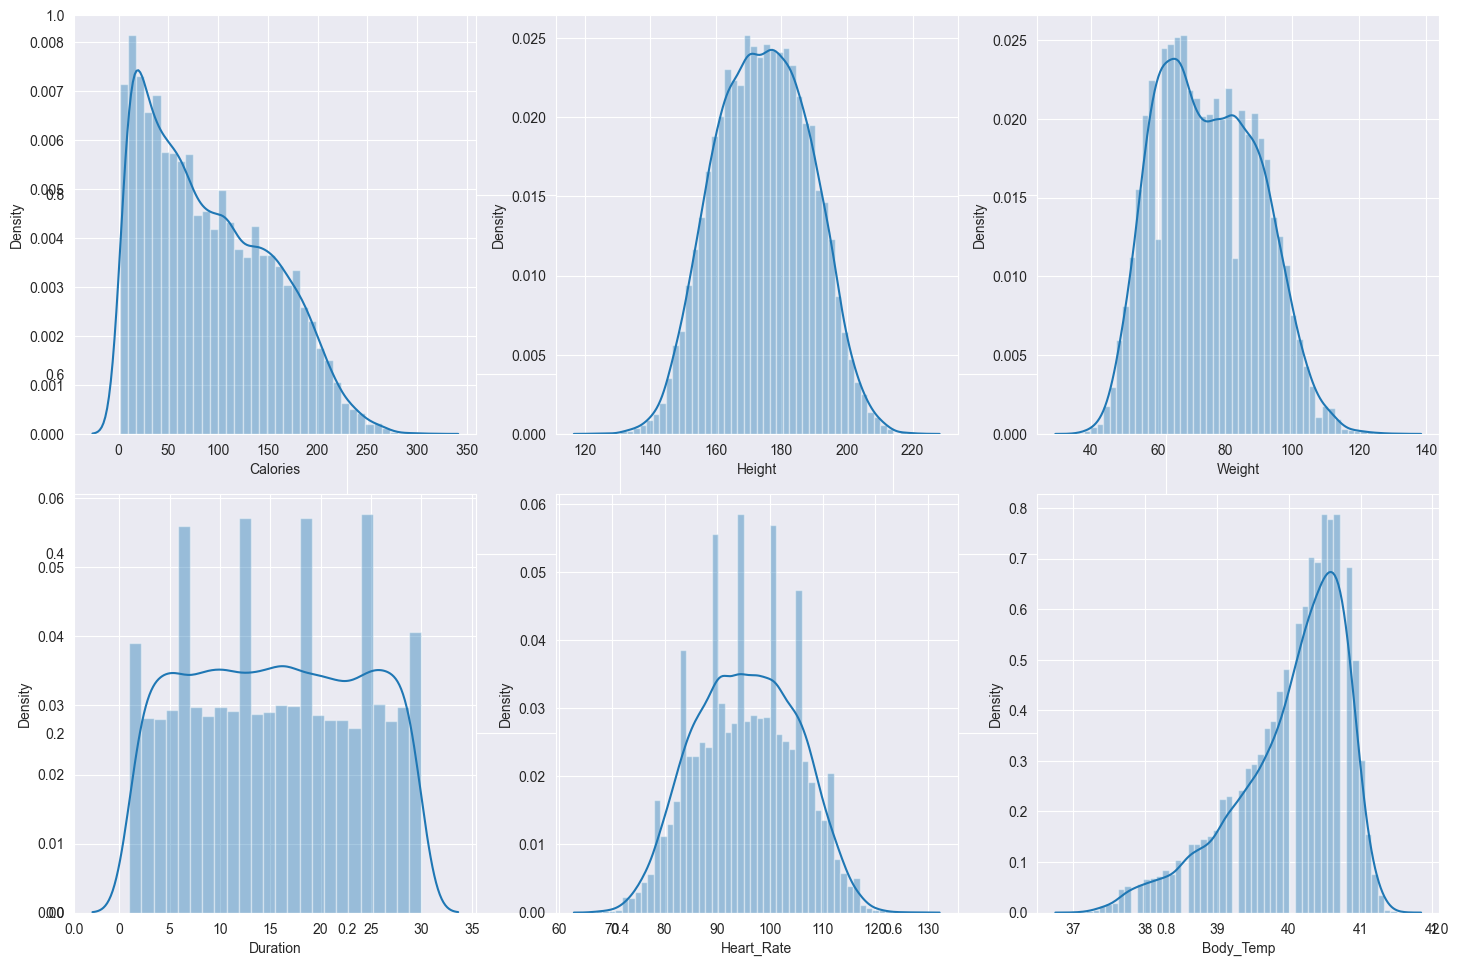

In [14]:
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.distplot(df[col])
plt.tight_layout()
plt.show()

In [15]:
df.replace({'male': 0, 'female': 1},
           inplace=True)
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,10001159,76.0,1,67,176.0,74.0,12.0,103.0,39.6
1,10001607,93.0,1,34,178.0,79.0,19.0,96.0,40.6
2,10005485,49.0,1,38,178.0,77.0,14.0,82.0,40.5
3,10005630,36.0,1,39,169.0,66.0,8.0,90.0,39.6
4,10006441,122.0,0,23,169.0,73.0,25.0,102.0,40.7


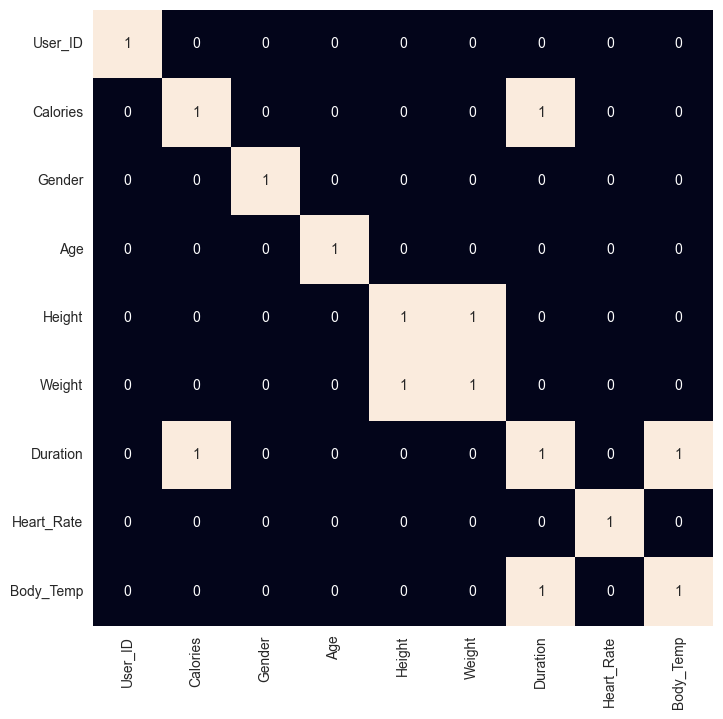

In [17]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()

In [18]:
to_remove = ['Weight', 'Duration']
df.drop(to_remove, axis=1, inplace=True)

In [19]:
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)
X_train.shape, X_val.shape

((13500, 5), (1500, 5))

In [20]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [21]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()


LinearRegression() : 
Training Error :  17.92326714155359
Validation Error :  17.987093133286834

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  7.75191154980825
Validation Error :  10.332014002025128

Lasso() : 
Training Error :  17.939219940830903
Validation Error :  18.013864